## Summary
### Oct 13, 2016
Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('poster')
%matplotlib inline

In [2]:
loc = '/Users/elena/Documents/Kaggle/Allstate/data/'
train = pd.read_csv(loc+'train.csv')
train.columns

Index([u'id', u'cat1', u'cat2', u'cat3', u'cat4', u'cat5', u'cat6', u'cat7',
       u'cat8', u'cat9',
       ...
       u'cont6', u'cont7', u'cont8', u'cont9', u'cont10', u'cont11', u'cont12',
       u'cont13', u'cont14', u'loss'],
      dtype='object', length=132)

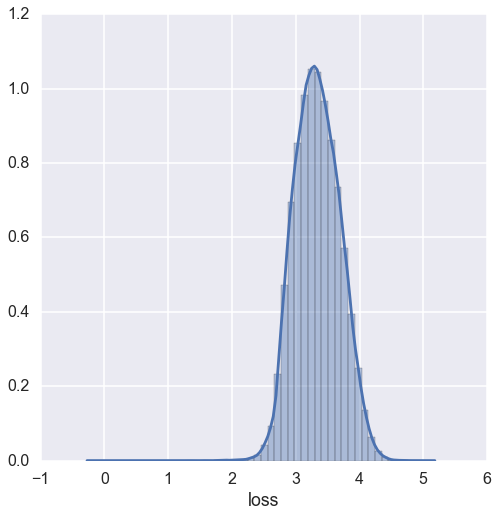

In [3]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.distplot(train['loss'])
plt.title('Loss')

plt.subplot(1,2,2)
sns.distplot(np.log10(train['loss']))
plt.title('Log(loss)')


In [4]:
# List of categorical columns
keepcats = [col for col in train.columns if 'cat' in col]
# List of continuous columns
keepcont = [col for col in train.columns if 'cont' in col]

print 'Categorical: ',len(keepcats)
print 'Continuous: ',len(keepcont)

Categorical:  116
Continuous:  14


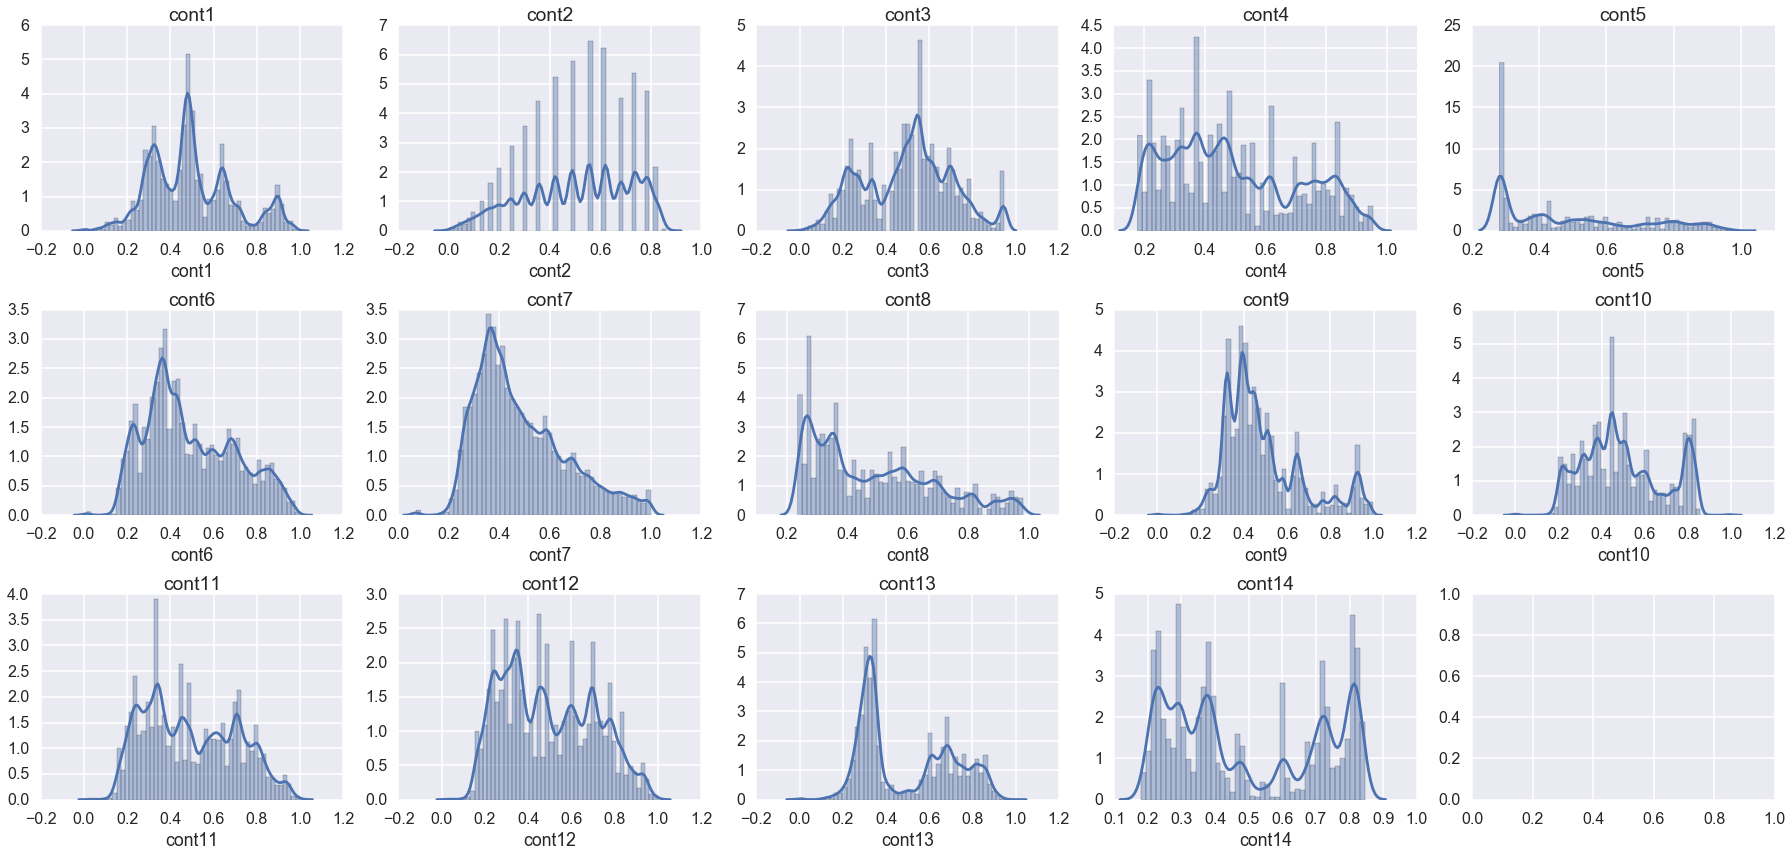

In [5]:
fig, axes = plt.subplots(3,5)
fig.set_size_inches(25, 12)
a = 1
for column in keepcont:
    plt.subplot(3,5,a)
    sns.distplot(train[column])
    plt.title(column)
    a+=1
    
plt.tight_layout()


/Users/elena/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Average RMSE (training data):  0.161449589471
Average RMSE (test data):  0.380466584996


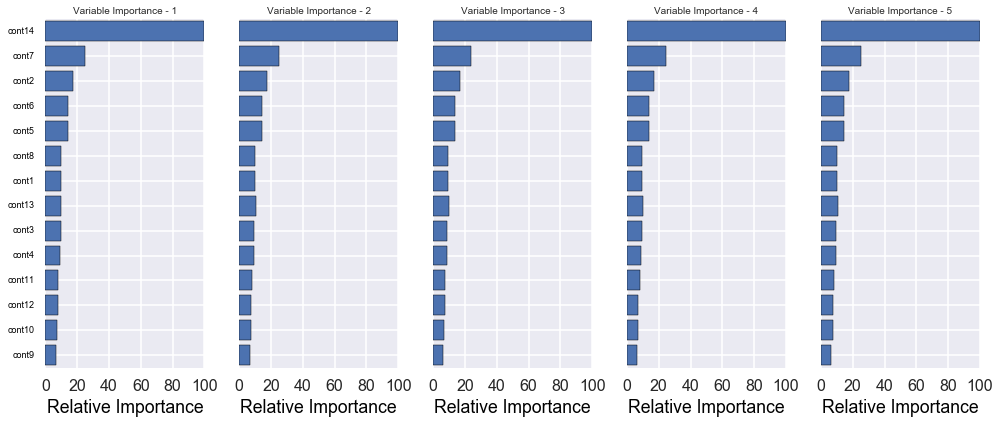

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target for Random Forest model
# let's only use the continuous features in the dataset for now
cont_only = train[keepcont]
cont_only['log-loss']=np.log10(train['loss'])

x = cont_only[keepcont]
y = cont_only['log-loss']

plt.figure(figsize=(14,6))

avg_rmse = 0
avg_rmse2 = 0
for b in range(5):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.5)

    # Fit an Extra Trees model to the data
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    # display the relative importance of each attribute
    feature_importance = model.feature_importances_
    
    mse = mean_squared_error(y_train,model.predict(X_train))
    mse2 = mean_squared_error(y_test,model.predict(X_test))
    
    avg_rmse+=np.sqrt(mse)
    avg_rmse2+=np.sqrt(mse2)
    ####################################################
    # Plot the feature importances
    plt.subplot(1,5,b+1)
    # make importances relative to most important feature
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    if b==0:
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    if b==0:
        plt.yticks(pos, np.array(keepcont)[sorted_idx],color='k',fontsize=9)
    else:
        plt.yticks(pos,[])
#         frame = plt.gca()
#         frame.axes.yaxis.set_ticklabels([])
    plt.xlabel('Relative Importance',color='k')
    plt.title('Variable Importance - '+str(b+1),fontsize=10)
    
    #plt.text(25,3.5,r'RMSE$_{train}$= '+str(round(np.sqrt(mse),3)),fontsize=14)
    #plt.text(25,2.5,r'RMSE$_{test}$= '+str(round(np.sqrt(mse2),3)),fontsize=14)

plt.tight_layout()

print 'Average RMSE (training data): ',avg_rmse/5.0
print 'Average RMSE (test data): ',avg_rmse2/5.0

In [12]:
# What happens if you run this several times - what's the most important feature?
most_imp = []

for b in range(20):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.5)

    # Fit an Extra Trees model to the data
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    # display the relative importance of each attribute
    feature_importance = model.feature_importances_
    g = np.where(feature_importance==feature_importance.max())[0]
    most_important= np.array(keepcont)[g]
    most_imp.append(most_important[0])
    
most_imp = np.array(most_imp)
for top in np.unique(most_imp):
    allofthem = np.where(most_imp==top)[0]
    print top,': ',len(allofthem)/20.0 * 100.0


cont14 :  100.0
